<a href="https://colab.research.google.com/github/prasadboyina/statstical-learning/blob/main/case_study_stastics_and_data_visulaisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/commodity_prices (1).csv")

In [43]:
df

,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1,1960-01-01,1.63,1.63,0.940900,0.696864,0.930301,1.121401,1.037400,0.122356,0.116845,0.066600
1,2,1960-02-01,1.63,1.63,0.946900,0.688707,0.930301,1.121401,1.037400,0.122356,0.119049,0.067900
2,3,1960-03-01,1.63,1.63,0.928100,0.688707,0.930301,1.121401,1.037400,0.122356,0.121254,0.068300
3,4,1960-04-01,1.63,1.63,0.930300,0.684519,0.930301,1.121401,1.037400,0.122356,0.123459,0.068100
4,5,1960-05-01,1.63,1.63,0.920000,0.690692,0.930301,1.121401,1.037400,0.122356,0.121254,0.068300
...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,2022-08-01,98.60,97.75,5.917861,2.417366,4.210000,3.538154,2.360000,0.330773,0.782199,0.393525
752,753,2022-09-01,90.16,90.63,5.897138,2.455065,4.490000,3.153198,2.360000,0.323621,0.770956,0.390659
753,754,2022-10-01,93.13,90.59,5.292852,2.270979,4.135621,2.833112,2.457500,0.320943,0.762578,0.386911
754,755,2022-11-01,91.07,86.28,4.715462,2.041258,3.831528,2.849979,2.490000,0.332993,0.792340,0.407414


In [ ]:
df.shape

(756, 12)

In [ ]:
df.columns

Index(['Unnamed: 0', 'date', 'oil_brent', 'oil_dubai', 'coffee_arabica',
       'coffee_robustas', 'tea_columbo', 'tea_kolkata', 'tea_mombasa',
       'sugar_eu', 'sugar_us', 'sugar_world'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       756 non-null    int64  
 1   date             756 non-null    object 
 2   oil_brent        756 non-null    float64
 3   oil_dubai        756 non-null    float64
 4   coffee_arabica   756 non-null    float64
 5   coffee_robustas  756 non-null    float64
 6   tea_columbo      756 non-null    float64
 7   tea_kolkata      756 non-null    float64
 8   tea_mombasa      756 non-null    float64
 9   sugar_eu         756 non-null    float64
 10  sugar_us         756 non-null    float64
 11  sugar_world      756 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 71.0+ KB


changing the date into object to datetime

In [ ]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       756 non-null    int64         
 1   date             756 non-null    datetime64[ns]
 2   oil_brent        756 non-null    float64       
 3   oil_dubai        756 non-null    float64       
 4   coffee_arabica   756 non-null    float64       
 5   coffee_robustas  756 non-null    float64       
 6   tea_columbo      756 non-null    float64       
 7   tea_kolkata      756 non-null    float64       
 8   tea_mombasa      756 non-null    float64       
 9   sugar_eu         756 non-null    float64       
 10  sugar_us         756 non-null    float64       
 11  sugar_world      756 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 71.0 KB


1)what is the maximum price of robusta coffee


In [ ]:
df['coffee_robustas'].max()

6.883547

2)what is the 75th percentile of sugar prices in the european union (EU)

In [ ]:
df['sugar_eu'].quantile(0.75)



np.float64(0.56951937998)

In [ ]:
percentile_75_eu=df['sugar_eu'].quantile(0.75)
print(percentile_75_eu)

0.56951937998


3)what is the skewness of the price distribution for arabica coffee

0to0.5 is symmetric ,0.5 t0 1 it is right symmetric ,if -1 it is left symmetric

In [ ]:
skewness=df['coffee_arabica'].skew()
print(skewness)


0.5903976942861767


4) is  the distribution of sugar prices in the us significantly different from normal distribution

-it should be symmetric
-the mean and median is same
-skweness is zero

In [ ]:
skweness_sugar_us=df['sugar_us'].skew()#skeweness =!0 i.e it is not normally distributed
print(skweness_sugar_us)

0.10340297222720043


here skew is not normally distributed let use shapiro

In [ ]:
from scipy.stats import shapiro
stat,p_value=shapiro(df['sugar_us'])#less than 0.05
p_value# here no ,the us sugar price distribution is not normally distribued


np.float64(4.46988728891317e-19)

here we can say shapiro is a not normally distributed  

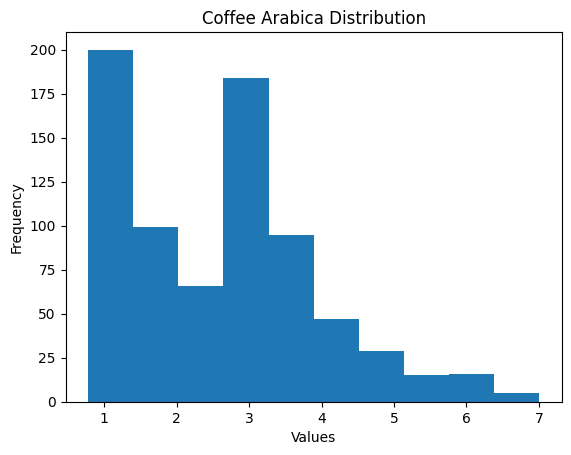

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['coffee_arabica'])
plt.title("Coffee Arabica Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()


5) how many times does the prices of dubai oil exceed the price of brent oil by a certain threshold $10

In [ ]:
number_of_times = (df["oil_dubai"]-df["oil_brent"]>10).sum()
number_of_times

np.int64(0)

6) what is the overall price trend for each commodity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       756 non-null    int64  
 1   date             756 non-null    object 
 2   oil_brent        756 non-null    float64
 3   oil_dubai        756 non-null    float64
 4   coffee_arabica   756 non-null    float64
 5   coffee_robustas  756 non-null    float64
 6   tea_columbo      756 non-null    float64
 7   tea_kolkata      756 non-null    float64
 8   tea_mombasa      756 non-null    float64
 9   sugar_eu         756 non-null    float64
 10  sugar_us         756 non-null    float64
 11  sugar_world      756 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 71.0+ KB


In [ ]:
df.columns#except date everything is a product

Index(['Unnamed: 0', 'date', 'oil_brent', 'oil_dubai', 'coffee_arabica',
       'coffee_robustas', 'tea_columbo', 'tea_kolkata', 'tea_mombasa',
       'sugar_eu', 'sugar_us', 'sugar_world'],
      dtype='object')

In [ ]:
a=['oil_brent', 'oil_dubai', 'coffee_arabica',
       'coffee_robustas', 'tea_columbo', 'tea_kolkata', 'tea_mombasa',
       'sugar_eu', 'sugar_us', 'sugar_world']


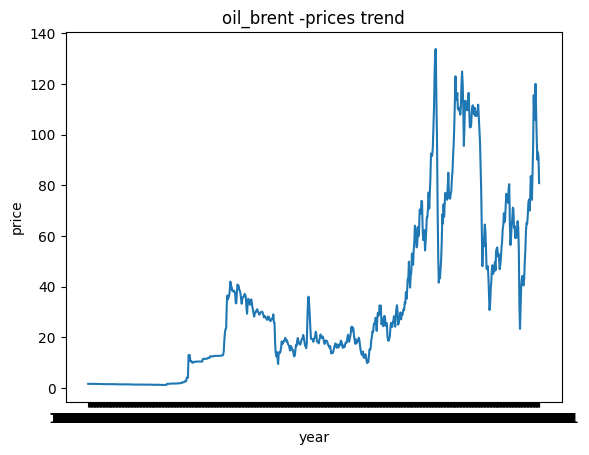

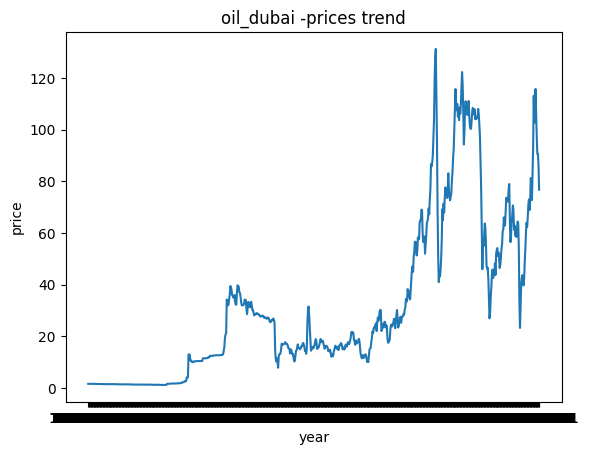

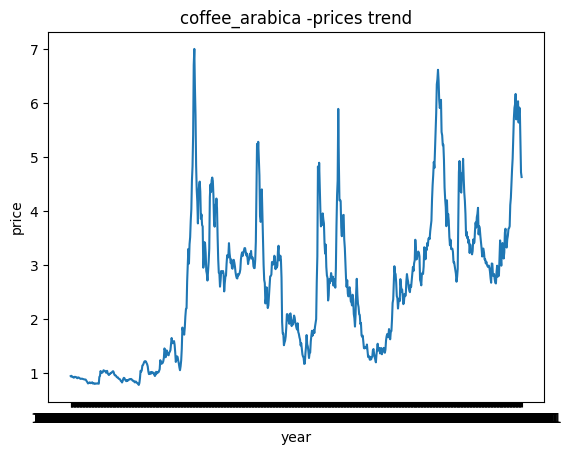

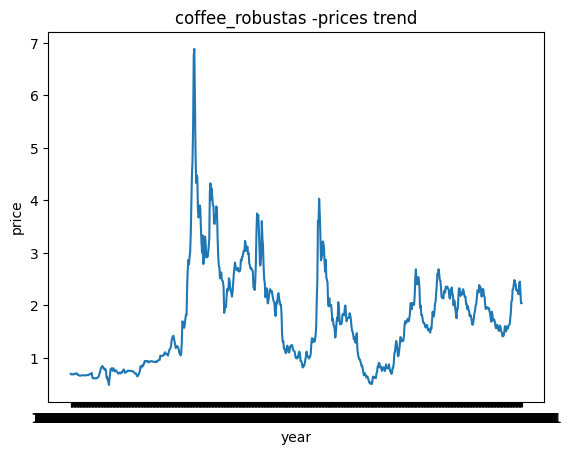

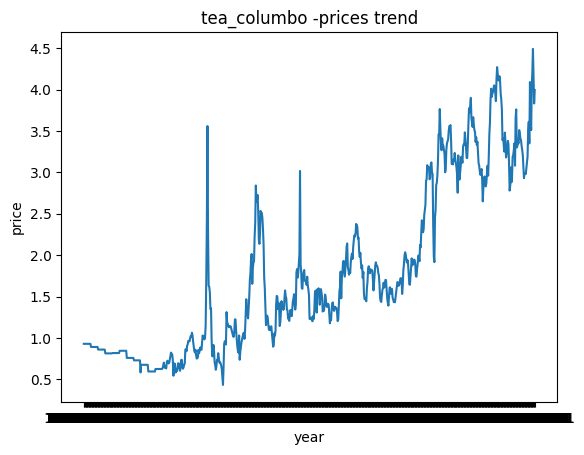

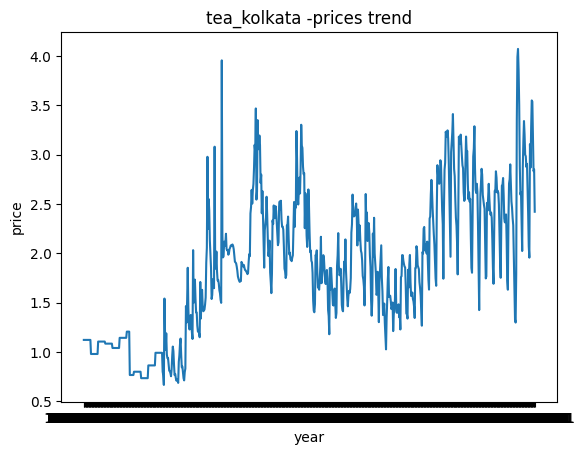

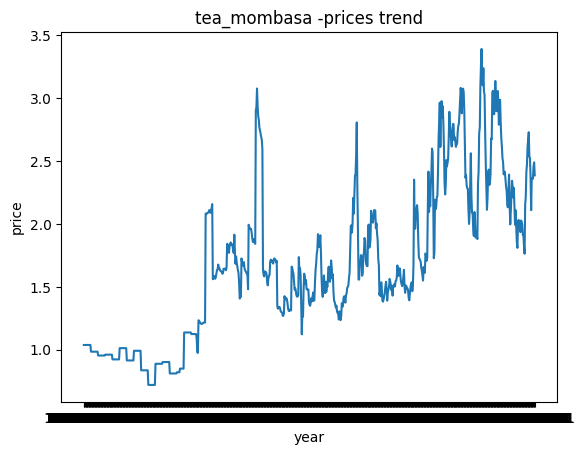

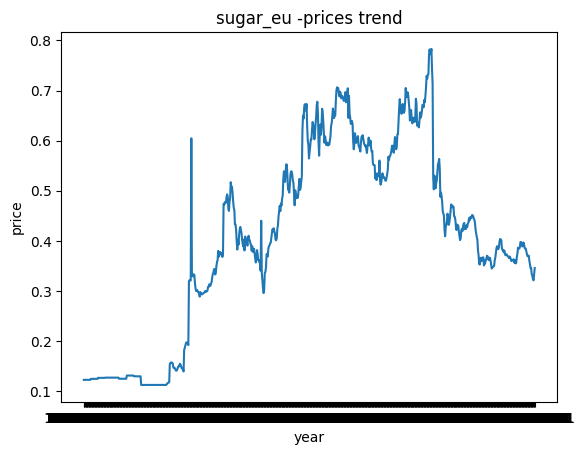

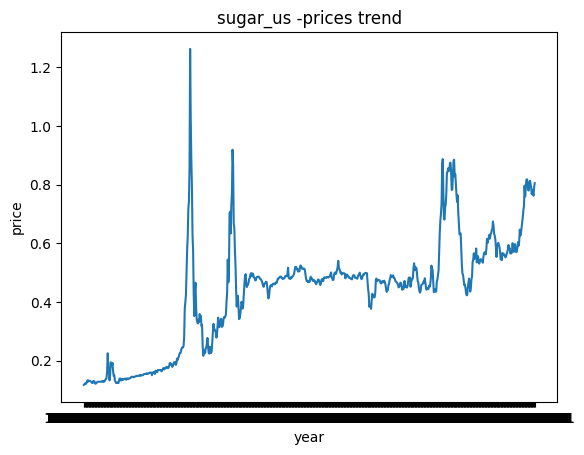

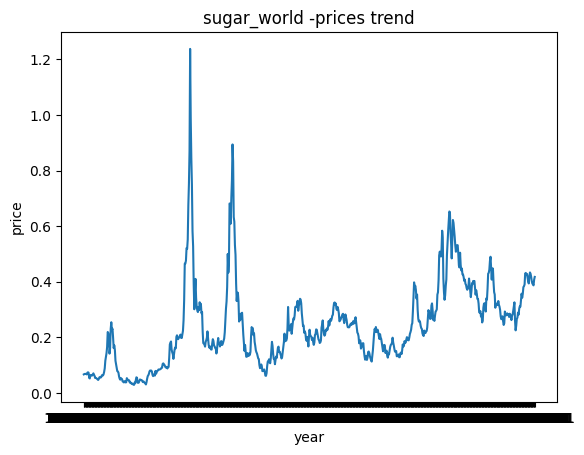

In [ ]:
for i in a:
  plt.plot(df['date'],df[i])
  plt.xlabel('year')
  plt.ylabel('price')
  plt.title(f'{i} -prices trend')
  plt.show()

7) which commodity expreienced the highest price fluctuations during the observed period

In [ ]:
for i in a:
  print('price fluctuation',i,df[i].max()-df[i].min())

price fluctuation oil_brent 132.66304347826
price fluctuation oil_dubai 130.0147826087
price fluctuation coffee_arabica 6.226
price fluctuation coffee_robustas 6.3963372
price fluctuation tea_columbo 4.0558021
price fluctuation tea_kolkata 3.4082116538099996
price fluctuation tea_mombasa 2.6729003000000002
price fluctuation sugar_eu 0.670955482
price fluctuation sugar_us 1.1464024
price fluctuation sugar_world 1.209


8)How does brent oil prices vary on a quarterly basis since last five year

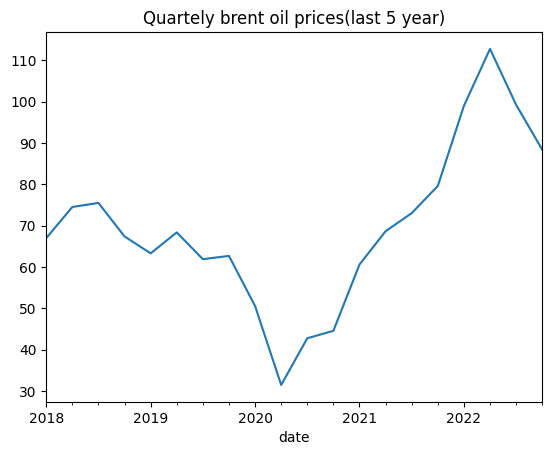

In [ ]:
last_5_year=df[df['date']>='2018-01-01']

brent_series = last_5_year.set_index('date')['oil_brent']


brent_series.index = pd.to_datetime(brent_series.index)

quarterly_brent_oil=brent_series.resample('QE').mean()

quarterly_brent_oil.plot(title="Quartely brent oil prices(last 5 year)")
plt.show()

9) is there a correlation between